# Installation

In [ ]:
! pip install tweepy
! pip install python-dotenv
! pip install -U textblob
! pip install nltk
! pip install -U spacy
# python -m spacy download en_core_web_sm

# Import necessary libraries

In [98]:
import tweepy
from textblob import TextBlob
import pandas as pd
from dotenv import load_dotenv
import os
import csv
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from textblob import TextBlob
import matplotlib.pyplot as plt

# Twitter API

In [2]:
load_dotenv()

True

In [5]:
consumer_key = os.environ["API_KEY"]
consumer_secret = os.environ["API_KEY_SECRET"]
access_token = os.environ["ACCESS_TOKEN"]
access_secret = os.environ["ACCESS_TOKEN_SECRET"]

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)


# Data Collection

### Search tweets

In [36]:
# List of queries
queries = ['Technology Innovation UAE', 'Meta Verse UAE', 'Technology Footprint in UAE', 
           'Artificial Intelligence UAE', 'Museum of the Future Dubai', 'Autonomous cars UAE',
           'Expo 2020','ChatGPT UAE', 'Solar power UAE', 'Automation UAE',
           'Robotics UAE', 'Machine learning UAE', 'Abu Dhabi G42', 'Neurotechnology UAE', 'Self driving UAE',
           'Emirates Lunar Mission', 'UAE Hackathon', 'UAE Moon', 'Women in Tech UAE', 'Police drones UAE',
           'Self driving taxi UAE', 'codershq', 'UAE space', 'Dubai smart city', 'AI office UAE', 'Emirates airlines',
           'Dubai airport']

# Collect tweets
tweets = []
for query in queries:
    full_query = f"{query} -filter:retweets"
    cursor = tweepy.Cursor(api.search, q=full_query, lang='en', tweet_mode='extended').items(500)
    for tweet in cursor:
        tweets.append(tweet.full_text)

In [37]:
# total no. of tweets retrieved.
len(tweets)

2099

In [38]:
# first 5 tweets
tweets[:5]

["It's great to see  President of Poland, Mr. Andrzej Duda, taking an interest in Masdar City , a hub for sustainable technology and innovation.\n#Masdar #uae #poland #uaePoland https://t.co/nYuTNJ6DKb",
 "Great to see #UAE continued efforts to foster #innovation  and technology! HH Sheikh Khaled bin Mohamed's meeting with @Microsoft  Vice Chair &amp; President shows the country's commitment to digital transformation and #collaboration  with global leaders. https://t.co/sGc492VkH3",
 'Just in: HH Sheikh Khaled bin Mohamed bin Zayed Al Nahyan meets with Microsoft Vice Chair &amp; President @BradSmi in #AbuDhabi, discussing the exciting potential of technology to drive growth and innovation in the #UAE. #Microsoft #partnership https://t.co/gdgm23N3OH',
 'Joining forces for #innovation!\n The Emirates Group hosts #FORSA_TEK - an annual event that brings together Intelak, Aviation X Lab, #startups, industry majors &amp; key technology partners to create new opportunities in #aviation. Exci

### Store tweets into csv - only write once (first time)

In [39]:
# f = open("tweets2.csv", "a")
# writer = csv.writer(f)
# for tweet in tweets:
#     writer.writerow([tweet])
# f.close()

# Text preprocessing - Tokenizing, Removing stop words, punctuations, URLs and twitter mentions

### Function to process the tweets

In [76]:
# Download necessary tools from NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Define stop words and stemmer
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

# Define regular expression for removing punctuation
punct_pattern = re.compile(r'[^\w\s]')

# Define regular expression for removing URLs and mentions
url_pattern = re.compile(r'https?://\S+|www\.\S+')
mention_pattern = re.compile(r'@[A-Za-z0-9_]+')

# Define function to perform text processing
def process_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = url_pattern.sub('', text)

    # Remove user mentions
    text = mention_pattern.sub('', text)
    
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    
    # Stem words
    # tokens = [stemmer.stem(token) for token in tokens]
    
    # Remove punctuation
    tokens = [punct_pattern.sub('', token) for token in tokens]
    
    # Remove any remaining empty tokens
    tokens = [token for token in tokens if token]

    # Join tokens back into a single string
    text_processed = ' '.join(tokens)
    
    return text_processed

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sadiq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sadiq\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Testing if preprocess works

In [42]:
# Original tweet
tweets[0]

"It's great to see  President of Poland, Mr. Andrzej Duda, taking an interest in Masdar City , a hub for sustainable technology and innovation.\n#Masdar #uae #poland #uaePoland https://t.co/nYuTNJ6DKb"

In [77]:
# Processed tweet
process_text(tweets[0])

['s', 'great', 'see', 'president', 'poland', 'mr', 'andrzej', 'duda', 'taking', 'interest', 'masdar', 'city', 'hub', 'sustainable', 'technology', 'innovation', 'masdar', 'uae', 'poland', 'uaepoland']


's great see president poland mr andrzej duda taking interest masdar city hub sustainable technology innovation masdar uae poland uaepoland'

### Preprocess all tweets

In [78]:
# Process all tweets
process_tweets = []
for tweet in tweets:
    process_tweets.append(process_text(tweet))

['s', 'great', 'see', 'president', 'poland', 'mr', 'andrzej', 'duda', 'taking', 'interest', 'masdar', 'city', 'hub', 'sustainable', 'technology', 'innovation', 'masdar', 'uae', 'poland', 'uaepoland']
['great', 'see', 'uae', 'continued', 'efforts', 'foster', 'innovation', 'technology', 'hh', 'sheikh', 'khaled', 'bin', 'mohamed', 's', 'meeting', 'vice', 'chair', 'amp', 'president', 'shows', 'country', 's', 'commitment', 'digital', 'transformation', 'collaboration', 'global', 'leaders']
['hh', 'sheikh', 'khaled', 'bin', 'mohamed', 'bin', 'zayed', 'al', 'nahyan', 'meets', 'microsoft', 'vice', 'chair', 'amp', 'president', 'abudhabi', 'discussing', 'exciting', 'potential', 'technology', 'drive', 'growth', 'innovation', 'uae', 'microsoft', 'partnership']
['joining', 'forces', 'innovation', 'emirates', 'group', 'hosts', 'forsa_tek', 'annual', 'event', 'brings', 'together', 'intelak', 'aviation', 'x', 'lab', 'startups', 'industry', 'majors', 'amp', 'key', 'technology', 'partners', 'create', 'ne

# Data labelling - Sentiment Analysis

##### Print top 5 tweets belonging to - Positive, Neutral and Negative categories based on their sentiment scores on processed tweets

In [93]:
topPos = {}
topNeu = {}
topNeg = {}

for tweet in process_tweets:
    analysis = TextBlob(tweet)
    if len(topPos) < 5:
        if(analysis.sentiment.polarity > 0.8):
            topPos[analysis.sentiment.polarity] = tweet
    if len(topNeu) < 5:
        if(analysis.sentiment.polarity >= -0.2 and analysis.sentiment.polarity <= 0.2):
            topNeu[analysis.sentiment.polarity] = tweet
    if len(topNeg) < 5:
        if(analysis.sentiment.polarity < -0.5):
            topNeg[analysis.sentiment.polarity] = tweet


# Sorting positive top 5 list
tempKeys = list(topPos.keys())
tempKeys.sort(reverse = True)
sorted_dict = {i: topPos[i] for i in tempKeys}
 
topPos = sorted_dict

# Sorting neutral top 5 list
tempKeys = list(topNeu.keys())
tempKeys.sort(reverse = True)
sorted_dict = {i: topNeu[i] for i in tempKeys}
 
topNeu = sorted_dict

# Sorting negative top 5 list
tempKeys = list(topNeg.keys())
tempKeys.sort(reverse = True)
sorted_dict = {i: topNeg[i] for i in tempKeys}
 
topNeg = sorted_dict


print("TOP 5 POSITIVE: ")
print(" ")
for i in topPos.keys():
    print("%.2f" % i,": ", topPos[i])
    print('')

print('----------------------------------------')
print(" ")
print("TOP 5 NEUTRAL: ")
print(" ")
for i in topNeu.keys():
    print("%.2f" % i,": ", topNeu[i])
    print('')
print('----------------------------------------')

print(" ")
print("TOP 5 NEGATIVE: ")
print(" ")
for i in topNeg.keys():
    print("%.2f" % i,": ", topNeg[i])
    print('')


TOP 5 POSITIVE: 
 
1.00 :  abu dhabi airport named world best arrival read socialkandura abudhabiairport abudhabi dubainews dubai mydubai dubailife localnews breakingnews citynews regionalnews localupdates localstories localheadlines

0.90 :  also flew via world best airlines qatar airways fly emirates

0.88 :  wishing emirati astronaut sultan al neyadi best upcoming 6month space mission part xspace crew6 team remarkable achievement highlights uae s commitment space exploration innovation uae spacemission nasa سلطان_النيادي crew6

0.85 :  dubai landing dubai quite beautiful airport

0.85 :  hi strongly recommend make cards magnificent features see people shifting airlines emirates also ccs banks attractive best card best banking

----------------------------------------
 
TOP 5 NEUTRAL: 
 
0.20 :  uae s emirates airlines introduces world s firstever robotic checkin system airports innovative technology set transform air travel experience making faster efficient passengers roboticchecki

### Updating csv to contain sentiment scores for each tweet

In [113]:
# Create variables to hold the average polarity
positive = 0
negative = 0
neutral = 0
polarity = 0

In [114]:
f = open("tweets2.csv", "a")
writer = csv.writer(f)
writer.writerow(['Tweets', 'Sentiment'])


for tweet in tweets:
    analysis = TextBlob(process_text(tweet)) 
    polarity += analysis.sentiment.polarity
   
    if(analysis.sentiment.polarity == 0):
        neutral += 1
        writer.writerow([tweet, 0])
       
    elif(analysis.sentiment.polarity < 0.00):
        negative += 1
        writer.writerow([tweet, -1])

    elif(analysis.sentiment.polarity > 0.00):
        positive += 1
        writer.writerow([tweet, 1])

f.close()


['s', 'great', 'see', 'president', 'poland', 'mr', 'andrzej', 'duda', 'taking', 'interest', 'masdar', 'city', 'hub', 'sustainable', 'technology', 'innovation', 'masdar', 'uae', 'poland', 'uaepoland']
['great', 'see', 'uae', 'continued', 'efforts', 'foster', 'innovation', 'technology', 'hh', 'sheikh', 'khaled', 'bin', 'mohamed', 's', 'meeting', 'vice', 'chair', 'amp', 'president', 'shows', 'country', 's', 'commitment', 'digital', 'transformation', 'collaboration', 'global', 'leaders']
['hh', 'sheikh', 'khaled', 'bin', 'mohamed', 'bin', 'zayed', 'al', 'nahyan', 'meets', 'microsoft', 'vice', 'chair', 'amp', 'president', 'abudhabi', 'discussing', 'exciting', 'potential', 'technology', 'drive', 'growth', 'innovation', 'uae', 'microsoft', 'partnership']
['joining', 'forces', 'innovation', 'emirates', 'group', 'hosts', 'forsa_tek', 'annual', 'event', 'brings', 'together', 'intelak', 'aviation', 'x', 'lab', 'startups', 'industry', 'majors', 'amp', 'key', 'technology', 'partners', 'create', 'ne

### Visualize number of tweets belonging to Positive, Neutral and Negative sentiments

In [109]:
## Define a function to calculate the percentage ##
def percentage(part, whole):
    return 100 * float(part)/float(whole)

positive = percentage(positive, len(process_tweets))
negative = percentage(negative, len(process_tweets))
neutral  = percentage(neutral, len(process_tweets))
polarity  = percentage(polarity, len(process_tweets))

# Limit the decimal upto 2 places #
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')


['s', 'great', 'see', 'president', 'poland', 'mr', 'andrzej', 'duda', 'taking', 'interest', 'masdar', 'city', 'hub', 'sustainable', 'technology', 'innovation', 'masdar', 'uae', 'poland', 'uaepoland']
['great', 'see', 'uae', 'continued', 'efforts', 'foster', 'innovation', 'technology', 'hh', 'sheikh', 'khaled', 'bin', 'mohamed', 's', 'meeting', 'vice', 'chair', 'amp', 'president', 'shows', 'country', 's', 'commitment', 'digital', 'transformation', 'collaboration', 'global', 'leaders']
['hh', 'sheikh', 'khaled', 'bin', 'mohamed', 'bin', 'zayed', 'al', 'nahyan', 'meets', 'microsoft', 'vice', 'chair', 'amp', 'president', 'abudhabi', 'discussing', 'exciting', 'potential', 'technology', 'drive', 'growth', 'innovation', 'uae', 'microsoft', 'partnership']
['joining', 'forces', 'innovation', 'emirates', 'group', 'hosts', 'forsa_tek', 'annual', 'event', 'brings', 'together', 'intelak', 'aviation', 'x', 'lab', 'startups', 'industry', 'majors', 'amp', 'key', 'technology', 'partners', 'create', 'ne

In [111]:
print("How people are reacting on Technology and Innovation in UAE" + 
      " By analyzing " + str(len(process_tweets)) + " Tweets ")

if (polarity == 0):
    print("Neutral")
    
elif (polarity < 0.00):
    print("Negative")
    
elif (polarity > 0.00):
    print("Positive")

How people are reacting on Technology and Innovation in UAE By analyzing 2099 Tweets 
Positive


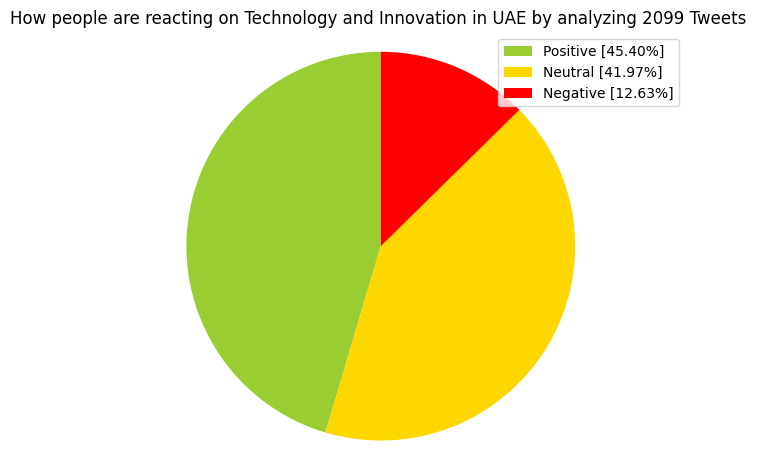

In [112]:
## Print the Pie Chart ##
    
labels = ['Positive ['+str(positive)+'%]', 
          'Neutral ['+str(neutral)+'%]', 
          'Negative ['+str(negative)+'%]']

sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'gold', 'red']
patches, texts = plt.pie(sizes, colors = colors, startangle = 90)
plt.legend(patches, labels, loc = "best")
plt.title("How people are reacting on Technology and Innovation in UAE" + 
      " by analyzing " + str(len(process_tweets)) + " Tweets ")
plt.axis('equal')
plt.tight_layout()
plt.show()